# Comparing results from different levels of theory

This tutorial shows how to compare results from different levels of theory, including CREST, CENSO, and single-point DFT calculations on CREST geometries.

- To get started, make sure that the GEOM repo is in your path
- You'll also need to install the [Neural Force Field repository](https://github.com/learningmatter-mit/NeuralForceField) and put it in your path. We'll be using it to rapidly compare distances between conformers using batching with PyTorch

**Note: this tutorial uses the latest GEOM data generated for the MoleculeNet dataset, using both CREST and CENSO. This data will soon be released publicly.**

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Change to your path for the GEOM repo 

import sys
sys.path.insert(0, '/home/saxelrod/Repo/projects/geom')

# Change to your Neural Force Field path

sys.path.insert(0, '/home/saxelrod/Repo/projects/master/NeuralForceField')



### Loading the CREST and CENSO data

In [3]:
from utils.compare import (load_pickle, get_all_distances, 
                           plot_geometry_changes, get_en_changes,
                           plot_en_changes,
                           plot_energy_comparison, plot_free_en_comparison)
import os

In [4]:

# change to your folders for the saved conformer data

base_dir = '/home/saxelrod/rgb_nfs/GEOM/data_after_reviews'
crest_dir = os.path.join(base_dir, 'bace_water/rd_mols')
censo_dir = os.path.join(base_dir, 'censo/rd_mols')

Load the conformer information for both CREST and CENSO:

In [5]:
import warnings

censo_dict = load_pickle(censo_dir)
crest_dict = load_pickle(crest_dir)

  0%|                                                                                                         | 0/1226 [00:00<?, ?it/s]RDKit WARNING: [17:36:18] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:18] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:18] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:18] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:18] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:18] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:18] Depickling from a version number (12.1)that is higher

  1%|▊                                                                                              | 11/1226 [00:00<00:11, 107.83it/s][17:36:18] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:18] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:18] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:18] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:18] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:18] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:18] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:

RDKit WARNING: [17:36:18] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:18] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:18] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:18] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:18] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:18] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:18] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:18] Depickling from a version number (12.1)tha

  2%|█▋                                                                                              | 22/1226 [00:00<00:16, 71.31it/s]RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from 

This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [

[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than ou

  3%|██▉                                                                                             | 37/1226 [00:00<00:20, 56.65it/s]RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:

[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:19] D

[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than ou

[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than ou

  4%|███▊                                                                                            | 49/1226 [00:00<00:23, 49.98it/s]r version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19

RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't

  4%|████▎                                                                                           | 55/1226 [00:01<00:24, 47.05it/s]RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher

RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:19] Depickling from a version number (12.1)tha

  5%|████▋                                                                                           | 60/1226 [00:01<00:25, 46.49it/s]RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:

[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:19] Depickling from a version number (12.1)that is higher tha

RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than ou

[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:20] Depickling from a version number (12.1)that is higher tha

[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than ou

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is

RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)tha

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNIN

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
 version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than 

  7%|██████▎                                                                                         | 81/1226 [00:01<00:31, 36.78it/s]RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:

[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than ou

[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is

RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WA

[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This pro

[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than ou

r version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a

RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This pro

[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than ou

r version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a

  8%|████████                                                                                       | 104/1226 [00:02<00:25, 43.91it/s]RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:20] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than ou

RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling f

RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't

r version (11.0).
This probably won't work.
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:21] Depickling from a

RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:21] Depickling from a version n

RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't

 10%|█████████▌                                                                                     | 124/1226 [00:02<00:23, 47.66it/s][17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKi

RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

 11%|█████████▉                                                                                     | 129/1226 [00:02<00:22, 47.83it/s]RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher

[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:21] Depickling from a version number (12.1)that is higher than ou

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:21] Depickling from a version number (12.1)that is higher tha

[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This pro

RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:21] Depickling from a version number (12.1)that is higher tha

RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
 12%|███████████▏                                                                                   | 145/1226 [00:03<00:22, 47.75it/s]RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a versi

RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
[17:36:21] Depickling from a version number (12.1)that is higher tha

RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)tha

[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:21] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This pro

 13%|████████████                                                                                   | 155/1226 [00:03<00:24, 42.97it/s]RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNIN

RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
[17:36:2

[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] D

 14%|████████████▊                                                                                  | 166/1226 [00:03<00:22, 47.26it/s][17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a versi

[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This pro

RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher tha

[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This pro

[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:22] Depickling from a version number (12.1)tha

RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:2

[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than ou

RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our versi

[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than ou

[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0

RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This

r version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a

 version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This proba

[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than ou

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:22] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:22] Depickling from a version number (12.1)that is higher tha

 16%|███████████████▎                                                                               | 197/1226 [00:04<00:29, 35.10it/s]RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:23] Depickli

RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)tha

 16%|███████████████▋                                                                               | 202/1226 [00:04<00:27, 37.83it/s]RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:

[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)tha

RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This

RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't

This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is

 17%|████████████████▎                                                                              | 210/1226 [00:04<00:28, 35.07it/s]RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:23] Depickling from a version number (12.1)that is hi

RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This

 17%|████████████████▌                                                                              | 214/1226 [00:04<00:28, 35.35it/s][17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:23] Depickling from a version number (12.1)tha

RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:23] Depickling from a version number (12.1)that is higher than our versi

[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)tha

RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)tha

[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than ou

[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than ou

RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

 18%|█████████████████▌                                                                             | 226/1226 [00:05<00:28, 34.68it/s] version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version

RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:23] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This pro

[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than ou

[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than ou

[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This pro

[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than ou

[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNIN

r version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a

 20%|██████████████████▊                                                                            | 243/1226 [00:05<00:21, 46.76it/s]r version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24

RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
r version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that

RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (

 20%|███████████████████▎                                                                           | 250/1226 [00:05<00:19, 51.07it/s]RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher

[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This pro

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher tha

RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our versi

[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (

RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

s higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] D

RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't

 version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:24] Depickling from a version number (12.1)that is higher tha

[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than ou

 22%|█████████████████████▏                                                                         | 273/1226 [00:06<00:21, 44.50it/s]bly won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version 

RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:24] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:24] Depickling from a version number (12.1)that is higher tha

 23%|█████████████████████▌                                                                         | 278/1226 [00:06<00:24, 39.45it/s]RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a versi

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WA

 23%|██████████████████████                                                                         | 285/1226 [00:06<00:20, 44.94it/s]r version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher tha

[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than ou

[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher tha

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
r version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work

[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
 24%|███████████████████████                                                                        | 298/1226 [00:06<00:18, 49.22it/s]RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a versi

[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than ou

[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This pro

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:25] Depickling from a version number (12.1)that is higher tha

r version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a

[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than ou

[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than ou

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a version numbe

RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't

[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:25] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This pro

r version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
 26%|███████████████████████

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:26] Depickling from a version number (12.1)that is higher tha

RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher tha

[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than ou

[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than ou

 27%|█████████████████████████▋                                                                     | 331/1226 [00:07<00:21, 41.16it/s]RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably w

RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is

RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This

[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than ou

RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)tha

RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This pro

[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than ou

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WA

RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)tha

[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than ou

This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a ve

 29%|███████████████████████████▊                                                                   | 359/1226 [00:08<00:19, 43.67it/s][17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)tha

[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than ou

RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (

RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:26] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This

[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNIN

RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:27] Depickling from a version n

 30%|████████████████████████████▋                                                                  | 370/1226 [00:08<00:17, 48.00it/s][17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:27] Depickling from a version number (12.1)tha

RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher tha

RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't

[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This pro

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNIN

[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
 31%|█████████████████████████████▍                                                                 | 380/1226 [00:08<00:19, 43.81it/s]RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKi

RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling f

 31%|█████████████████████████████▊                                                                 | 385/1226 [00:08<00:19, 43.31it/s]RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher

[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than ou

RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This

RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:27] Depickling from a version number (12.1

RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)tha

[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than ou

RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)tha

RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:27] Depickling from a version number (12.1)that is higher tha

 33%|███████████████████████████████▍                                                               | 406/1226 [00:09<00:21, 37.78it/s]RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:

[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:28] Depickling from a version n

 34%|███████████████████████████████▊                                                               | 411/1226 [00:09<00:20, 38.94it/s]r version (11.0).
This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:28

[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:28] Depickling from a version number (12.1)that is higher than our version (

RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This

RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher tha

 35%|████████████████████████████████▊                                                              | 423/1226 [00:09<00:19, 40.30it/s]RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:28] Depickling from a version number (12.1

[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than ou

RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)tha

RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)tha

[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
 35%|█████████████████████████████████▏                                                             | 428/1226 [00:09<00:22, 35.47it/s]RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKi

RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't

RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't

RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:2

 36%|█████████████████████████████████▉                                                             | 438/1226 [00:10<00:19, 39.68it/s]RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] D

 36%|██████████████████████████████████▎                                                            | 443/1226 [00:10<00:19, 40.54it/s][17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:28] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't

RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This

[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:29] D

RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)tha

[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This pro

RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)tha

RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
 38%|███████████████████████████████████▉                                                           | 464/1226 [00:10<00:15, 49.96it/s]RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKi

RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't

 38%|████████████████████████████████████▍                                                          | 471/1226 [00:10<00:14, 52.89it/s]RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher

RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)tha

RDKit WARNING: This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher tha

[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher tha

[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than ou

[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than ou

RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our versi

 40%|█████████████████████████████████████▉                                                         | 490/1226 [00:11<00:14, 51.13it/s]RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher

[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than ou

RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:29] Depickling from a version number (12.1)tha

RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher tha

RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
 41%|██████████████████████████████████████▉                                                        | 502/1226 [00:11<00:15, 47.15it/s]RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher

RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This

r version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
 41%|███████████████████████

RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)tha

RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't

[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than ou

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher tha

 42%|████████████████████████████████████████▎                                                      | 520/1226 [00:11<00:13, 50.45it/s] version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version

[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than ou

[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than ou

RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This

RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This

 43%|█████████████████████████████████████████▎                                                     | 533/1226 [00:11<00:13, 51.42it/s][17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
[17:36:30] Depickling from a version number (12.1

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[

RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:30] Depickling from a version number (12.1)that is higher than our versi

r version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a

RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1

[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
 44%|█████████████████████████████████████████▊                         

[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:30] Depickling from a version number (12.1)that is higher than ou

[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is

RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't

[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
R

[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This pro

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from 

 46%|███████████████████████████████████████████▌                                                   | 562/1226 [00:12<00:12, 54.15it/s]RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably w

RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] D

RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] D

[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than ou

 47%|████████████████████████████████████████████▌                                                  | 575/1226 [00:12<00:17, 37.67it/s]RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher

[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than ou

[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than ou

 48%|█████████████████████████████████████████████▎                                                 | 584/1226 [00:13<00:13, 47.66it/s]RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably w

RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (

r version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:31] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work

RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)tha

RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:32] Depickling from a version n

RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:32] Depickling from a version number (12.1)that is higher than our versi

[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than ou

[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
 50%|███████████████████████████████████████████████▎                                               | 610/1226 [00:13<00:12, 48.66it/s][17:36:32] Depickling from a version number (12.1)that is higher tha

RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher tha

r version (11.0).
This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:32] Depickling from a

RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)tha

RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This

RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)tha

[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
 51%|████████████████████████████████████████████████▋                                              | 629/1226 [00:14<00:13, 43.01it/s][17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:32] Depickling from a version number (12.1)tha

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:32] Depickling from 

RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't

[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:32] Depickling from a version number (12.1)that is higher than our version (11.0).
This pro

[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:33] Depickling from a version number (12.1)that is higher than our version (

[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This pro

RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:33] Depickling from a version number (12.1

RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't

RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't

 53%|██████████████████████████████████████████████████▍                                            | 651/1226 [00:14<00:14, 40.63it/s]r version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: T

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher tha

 54%|██████████████████████████████████████████████████▊                                            | 656/1226 [00:14<00:13, 42.67it/s][17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:3

 version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This proba

[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than ou

 54%|███████████████████████████████████████████████████▏                                           | 661/1226 [00:14<00:12, 44.11it/s]RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:33] Depickli

RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version numbe

[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (

RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
[17:36:3

RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't

RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WA

 56%|████████████████████████████████████████████████████▉                                          | 683/1226 [00:15<00:11, 49.31it/s] version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version

RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:33] Depickling from a version number (12.1)that is higher tha

[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This pro

RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)tha

RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:3

 57%|██████████████████████████████████████████████████████▏                                        | 700/1226 [00:15<00:10, 47.87it/s][17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:3

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher tha

RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (

RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This

RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This

[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than ou

RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher tha

[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNIN

RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version numbe

[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than ou

 59%|███████████████████████████████████████████████████████▉                                       | 722/1226 [00:16<00:10, 46.53it/s]RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:34] Depickli

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WA

RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher tha

RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:34] D

RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This

RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This

 60%|████████████████████████████████████████████████████████▋                                      | 732/1226 [00:16<00:12, 38.33it/s]r version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35

 than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depicklin

RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from 

RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This

 61%|█████████████████████████████████████████████████████████▌                                     | 743/1226 [00:16<00:11, 41.96it/s]RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).


[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling f

[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This pro

[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)tha

 61%|█████████████████████████████████████████████████████████▉                                     | 748/1226 [00:16<00:12, 37.11it/s]RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher

RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:3

RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

RDKit WARNING: This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version numbe

RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)tha

RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (

[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than ou

[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than ou

[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:35] Depickling from a version number (12.1)tha

[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:35] Depickling from a version number (12.1)that is higher than ou

RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:36] Depickling from a version number (12.1)that is higher tha

[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than ou

[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
 64%|███████

[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:36] Depickling from a version number (12.1)that is higher tha

RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This

[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This pro

 64%|████████████████████████████████████████████████████████████▉                                  | 787/1226 [00:17<00:09, 44.43it/s]RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:

[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than ou

[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than ou

RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't

RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This

r version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a

 65%|██████████████████████████████████████████████████████████████                                 | 801/1226 [00:17<00:09, 46.14it/s]RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:

RDKit WARNING: This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from 

 66%|██████████████████████████████████████████████████████████████▌                                | 807/1226 [00:18<00:09, 46.26it/s]r version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36

RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (

 66%|██████████████████████████████████████████████████████████████▉                                | 812/1226 [00:18<00:09, 43.12it/s]r version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably wo

RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:36] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:36] Depickling from a version number (12.1)that is higher than our versi

[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher tha

[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WA

RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (

 67%|███████████████████████████████████████████████████████████████▎                               | 817/1226 [00:18<00:13, 31.36it/s]r version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37

RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't

 67%|███████████████████████████████████████████████████████████████▋                               | 822/1226 [00:18<00:12, 33.39it/s]RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:37] Depickling from a version number (12.1

RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)tha

RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
 67%|████████████████████████████████████████████████████████████████   

[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than ou

 68%|████████████████████████████████████████████████████████████████▍                              | 831/1226 [00:18<00:11, 33.75it/s]r version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37

 version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This proba

[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than ou

RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)tha

RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
 69%|█████████████████████████████████████████████████████████████████▏                             | 842/1226 [00:19<00:09, 40.00it/s][17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1

This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (1

[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than ou

[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than ou

 69%|█████████████████████████████████████████████████████████████████▋                             | 847/1226 [00:19<00:10, 37.17it/s]RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:

[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:37] Depickling from a version number (12.1)that is higher than ou

r version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a

RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling f

[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
 70%|██████████████████████████████████████████████████████████████████▎                            | 855/1226 [00:19<00:11, 32.60it/s]RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:

r version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a

[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than ou

 70%|██████████████████████████████████████████████████████████████████▌                            | 859/1226 [00:19<00:11, 32.56it/s]r version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38

RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling f

RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version n

 70%|██████████████████████████████████████████████████████████████████▊                            | 863/1226 [00:19<00:11, 31.59it/s]RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher tha

ber (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't wo

[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:38] Depickling f

[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This pro

[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than ou

[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (

RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This

RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:3

RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)tha

RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:38] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't

RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't

[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version n

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (

RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (

r version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a

 73%|████████████████████████████████████████████████████████████████████▉                          | 890/1226 [00:20<00:12, 27.65it/s] version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version

r version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a

RDKit WARNING: This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is

 73%|█████████████████████████████████████████████████████████████████████▎                         | 894/1226 [00:20<00:12, 27.22it/s]RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WA

 73%|█████████████████████████████████████████████████████████████████████▌                         | 898/1226 [00:20<00:11, 29.15it/s]RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher

RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't

[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than ou

RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] D

 74%|█████████████████████████████████████████████████████████████████████▉                         | 902/1226 [00:21<00:12, 24.95it/s]RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher

RDKit WARNING: This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:39] Depickling from a version number (12.1)that is higher than ou

RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version n

RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't

RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
 74%|██████████████████████████████████████████████████████████████████████▎                        | 908/1226 [00:21<00:12, 24.92it/s]RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a versi

[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WA

RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

 75%|██████████████████████████████████████████████████████████████████████▉                        | 915/1226 [00:21<00:11, 26.83it/s]RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:

RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (

This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (1

RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (

[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher tha

RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher tha

[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from 

r version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a

bly won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that i

RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:40] Depickling from a version number (12.1)that is higher tha

RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)tha

 76%|████████████████████████████████████████████████████████████████████████▌                      | 936/1226 [00:22<00:08, 33.23it/s]RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:41] Depickling from a version number (12.1)that is hi

RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling f

RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher tha

 77%|█████████████████████████████████████████████████████████████████████████▏                     | 944/1226 [00:22<00:07, 35.64it/s]RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher

RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher tha

RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)tha

 77%|█████████████████████████████████████████████████████████████████████████▍                     | 948/1226 [00:22<00:08, 31.98it/s]RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:41] Depickling from a version number (12.1

RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (

RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
 78%|█████████████████████████████████████████████████████████████████████████▊                     | 952/1226 [00:22<00:08, 32.39it/s][17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1

[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than ou

r version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a

 version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
 78%|█████

RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than ou

[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than ou

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:41] Depickling from a version number (12.1)that is higher tha

[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:41] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This pro

RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)tha

RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)tha

RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:42] Depickling from a version number (12.1)that is higher tha

RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:42] Depickling from a version number (12.1)that is higher tha

RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:42] Depickling from a version number (12.1)that is higher tha

 81%|████████████████████████████████████████████████████████████████████████████▋                  | 989/1226 [00:23<00:06, 36.19it/s]RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher

RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

 81%|████████████████████████████████████████████████████████████████████████████▉                  | 993/1226 [00:24<00:06, 33.39it/s]RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:

RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

RDKit WARNING: This probably won't work.
[17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:42] Depickling from a version number (12.1)that is higher than our version (11.0

RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

 82%|████████████████████████████████████████████████████████████████████████████▋                 | 1001/1226 [00:24<00:07, 29.91it/s]RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:

[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't wor

[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:43] Depickling from a version number (12.1)that is higher than ou

RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:43] Depickli

epickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:43] Depickling from a version number (12.1)that is higher than our version (1

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:4

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:43] D

RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)tha

r version (11.0).
This probably won't work.
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably

 83%|██████████████████████████████████████████████████████████████████████████████                | 1018/1226 [00:25<00:08, 25.83it/s]RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).


RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)tha

 83%|██████████████████████████████████████████████████████████████████████████████▎               | 1021/1226 [00:25<00:08, 24.82it/s]RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:43] Depickling from a versi

[17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:44] Depickling f

[17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)tha

 84%|██████████████████████████████████████████████████████████████████████████████▊               | 1028/1226 [00:25<00:08, 23.38it/s]RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:44] Depickli

 84%|███████████████████████████████████████████████████████████████████████████████▏              | 1033/1226 [00:25<00:07, 27.24it/s]RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:44] Depickling from a version n

 85%|███████████████████████████████████████████████████████████████████████████████▍              | 1036/1226 [00:25<00:07, 26.25it/s]RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).


RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:44] Depickling from a version n

RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)tha

r version (11.0).
This probably won't work.
[17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING

[17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
 85%|███████████████████████████████████████████████████████████████████████████████▋              | 1039/1226 [00:26<00:09, 19.38it/s]RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher

 85%|████████████████████████████████████████████████████████████████████████████████              | 1044/1226 [00:26<00:07, 23.64it/s]RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:44] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:44] Depickling from a version number (12.1)that is higher

RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:45] Depickling from a version n

RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't

RDKit WARNING: This probably won't work.
[17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
 86%|████████████████████████████████████████████████████████████████████████████████▋             | 1052/1226 [00:26<00:07, 23.87it/s]RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This pro

 86%|████████████████████████████████████████████████████████████████████████████████▉             | 1056/1226 [00:26<00:06, 26.65it/s]RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:

RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:45] Depickling from a version number (12.1)that is higher tha

[17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't wor

 87%|█████████████████████████████████████████████████████████████████████████████████▌            | 1063/1226 [00:26<00:06, 27.11it/s][17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't

RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:45] Depickling from a version number (12.1)tha

[17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:45] Depickling from a version number (12.1)tha

RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:45] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:45] Depickling from a version number (12.1)that is higher tha

RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:46] Depickling from a version number (12.1)that is higher tha

RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)tha

RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling f

 88%|██████████████████████████████████████████████████████████████████████████████████▋           | 1078/1226 [00:27<00:06, 22.05it/s]RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:46] Depickli

 88%|██████████████████████████████████████████████████████████████████████████████████▉           | 1081/1226 [00:27<00:06, 22.58it/s]RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:46] Depickling from a version number (12.1)that is hi

RDKit WARNING: This probably won't work.
[17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
 88%|███████████████████████████████████████████████████████████████████████████████████           | 1084/1226 [00:27<00:06, 23.45it/s]RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (

 89%|███████████████████████████████████████████████████████████████████████████████████▎          | 1087/1226 [00:27<00:05, 24.74it/s]RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher

RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:46] Depickling from a version n

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:46] Depickling from a version n

RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:46] Depickling from a version n

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:46] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
r version (11.0).
This probably won't work.
[17:36:46] Depickling from a version nu

 89%|████████████████████████████████████████████████████████████████████████████████████          | 1096/1226 [00:28<00:05, 22.32it/s]RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:47] Depickling from a version number (12.1)that is hi

[17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (

 90%|████████████████████████████████████████████████████████████████████████████████████▎         | 1099/1226 [00:28<00:07, 17.59it/s]RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:47] Depickling from a version number (12.1

RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:47] Depickling from a version n

RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:47] Depickling from a version n

RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:47] Depickling from a version number (12.1)that is higher tha

 91%|█████████████████████████████████████████████████████████████████████████████████████         | 1110/1226 [00:28<00:04, 23.22it/s]RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:47] Depickli

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher tha

 91%|█████████████████████████████████████████████████████████████████████████████████████▎        | 1113/1226 [00:29<00:05, 21.47it/s]RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher

RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:47] Depickling from a version number (12.1)tha

 91%|█████████████████████████████████████████████████████████████████████████████████████▌        | 1116/1226 [00:29<00:05, 20.79it/s]RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:48] Depickli

RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

 91%|█████████████████████████████████████████████████████████████████████████████████████▊        | 1120/1226 [00:29<00:04, 22.69it/s]RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:48] Depickling from a version number (12.1

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:48] Depickling from a version number (12.1)that is higher than our version (

RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't

RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
 92%|██████████████████████████████████████████████████████████████████████████████████████▋       | 1131/1226 [00:29<00:03, 26.31it/s]RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:48] Depickling from a versi

 93%|███████████████████████████████████████████████████████████████████████████████████████       | 1135/1226 [00:29<00:03, 29.65it/s][17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKi

RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

 93%|███████████████████████████████████████████████████████████████████████████████████████▎      | 1139/1226 [00:30<00:03, 27.58it/s]RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher

[17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
 93%|███████████████████████████████████████████████████████████████████████████████████████▌      | 1142/1226 [00:30<00:03, 26.64it/s]RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't

r version (11.0).
This probably won't work.
[17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:48] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't wor

RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

[17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNIN

 94%|████████████████████████████████████████████████████████████████████████████████████████▎     | 1152/1226 [00:30<00:02, 25.52it/s]RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:

 94%|████████████████████████████████████████████████████████████████████████████████████████▋     | 1156/1226 [00:30<00:02, 27.58it/s]RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:49] Depickli

[17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version numbe

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:4

RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:49] Depickling from a version n

[17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than ou

RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:49] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:4

 95%|█████████████████████████████████████████████████████████████████████████████████████████▋    | 1169/1226 [00:31<00:02, 24.14it/s]RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:50] Depickling from a version number (12.1

RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:50] Depickling from a version n

RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)tha

RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:50] Depickling from a version number (12.1)that is higher tha

 96%|██████████████████████████████████████████████████████████████████████████████████████████▍   | 1179/1226 [00:31<00:01, 25.56it/s]RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher

RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:50] Depickling from a version number (12.1)that is higher tha

RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WA

RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:5

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:50] Depickling from 

RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)tha

[17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:50] Depickling from a version number (12.1)tha

RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
[17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (

RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This

[17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:51] Depickling from a version number (12.1)that is higher than ou

 97%|███████████████████████████████████████████████████████████████████████████████████████████▍  | 1193/1226 [00:32<00:02, 13.99it/s]RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).


[17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:51] Depickling from a version number (12.1)that is higher tha

 98%|███████████████████████████████████████████████████████████████████████████████████████████▋  | 1196/1226 [00:32<00:01, 15.53it/s]RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:51] Depickling from a version number (12.1)that is hi

RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:51] Depickling from a version number (12.1)that is higher tha

RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:51] Depickling from a version n

RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:51] Depickling from a version number (12.1)tha

 98%|████████████████████████████████████████████████████████████████████████████████████████████▏ | 1202/1226 [00:33<00:01, 15.94it/s]RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:51] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:

[17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
 98%|████████████████████████████████████████████████████████████████████████████████████████████▍ | 1205/1226 [00:33<00:01, 16.15it/s]RDKit WARNING: [17:36:52] Depickling from a version n

[17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:52] Depickling from a version number (12.1)that is higher than our version (

RDKit WARNING: [17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:52] Depickling from a version number (12.1)that is higher tha

RDKit WARNING: [17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:52] Depickling from a version number (12.1)that is higher tha

 99%|████████████████████████████████████████████████████████████████████████████████████████████▉ | 1212/1226 [00:33<00:00, 18.62it/s]RDKit WARNING: [17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:52] Depickling from a version number (12.1)that is hi

RDKit WARNING: [17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:52] Depickling from a version number (12.1)that is higher than our versi

RDKit WARNING: This probably won't work.
[17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:52] Depickling from a version numbe

[17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:52] Depickling from a version number (12.1)that is higher than our version (

RDKit WARNING: [17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
[17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: [17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
[17:36:52] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't

[17:36:53] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:53] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:53] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:53] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:53] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:53] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:53] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:53] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNIN

[17:36:53] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:53] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:53] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:53] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
[17:36:53] Depickling from a version number (12.1)that is higher than our version (11.0).
This probably won't work.
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:53] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:53] Depickling from a version number (12.1)that is higher than our version (11.0).
RDKit WARNING: This probably won't work.
RDKit WARNING: [17:36:53] Depickling from a version number (12.1)that is higher than ou

### Geometry changes
Here we'll look at changes in conformer geometries when going from CREST to CENSO. We'll do this in two ways. The first way is just to look at the CREST conformer that was optimized, and see how much the geometry changed with CENSO. The second is to find the closest CREST conformer to each CENSO conformer, and then see how different they are. The second approach requires a lot of distance calculations, and so it's a bit slow.

In [6]:
out = get_all_distances(crest_dict,
                        censo_dict)

# `output_dic` contains distance information, while the last two outputs
# provide the index mapping between censo conformers and their seed conformers
# in crest (`censo_to_seed_crest`), or censo conformers and the closest
# conformer in crest (`censo_to_closest_crest`)

output_dic, censo_to_seed_crest, censo_to_closest_crest = out

Failed for smiles COc1ccc(C2(c3cccc(-c4cccnc4)c3)CC(OC)C(N)=N2)cc1 with error 'list index out of range'


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1226/1226 [09:22<00:00,  2.18it/s]


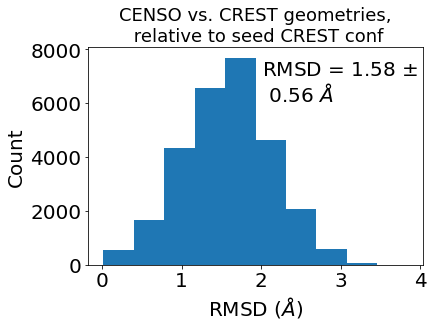

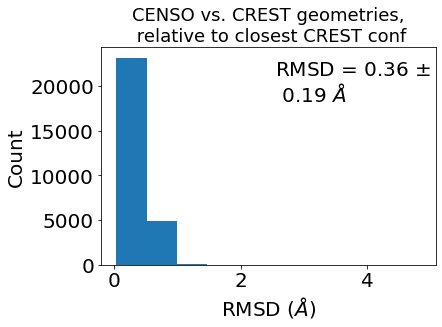

In [7]:
plot_geometry_changes(output_dic)

### Energy ranking changes
#### CREST vs. CENSO

Now we'll look at how the energetic ranking of each conformer changes. We'll plot the distribution of Spearman rank correlation coefficients $\rho$. Each $\rho$ data point measures the correlation between the energetic ranking of CREST conformers and the energetic ranking of CENSO conformers, for a given species. 

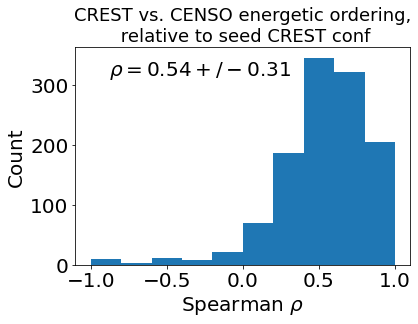

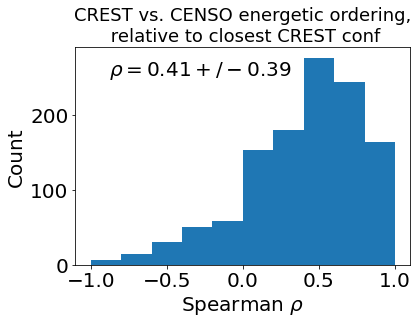

In [8]:
en_results = get_en_changes(censo_dict,
                                crest_dict,
                                censo_to_seed_crest,
                                censo_to_closest_crest)

plot_en_changes(en_results)

#### CENSO vs. single-point 
Next we'll compare the energetic orderings from a CENSO calculation with the single-point energies calculated for CREST goeometries. Single-point DFT calculations are contained in `censo_dict`, so we don't have to load any more information. All we need to do is call `plot_energy_comparison` and tell it the name of the DFT method for comparison (in our case `r2scan_3c_mtzvpp`):

100%|███████████████████████████████████████████████████████████████████████████████████████████| 1226/1226 [00:00<00:00, 12284.17it/s]


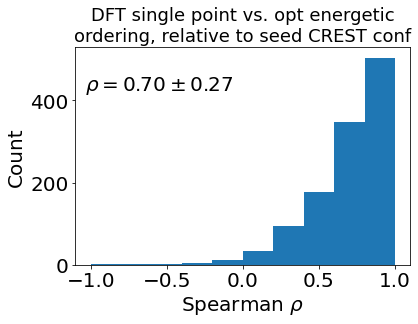

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 1226/1226 [00:03<00:00, 344.12it/s]


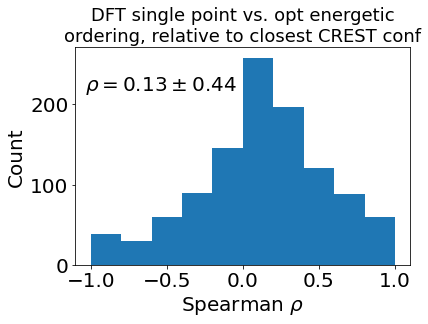

In [9]:
plot_energy_comparison(crest_dict,
                       censo_dict,
                       censo_to_closest_crest,
                       dft_name='r2scan_3c_mtzvpp')


### Energy vs. free energy
Lastly, let's compare the orderings based on CENSO energies to those based on CENSO free energies (which incorporate translational, rotational, and vibrational entropy, plus zero-point vibrational corrections).

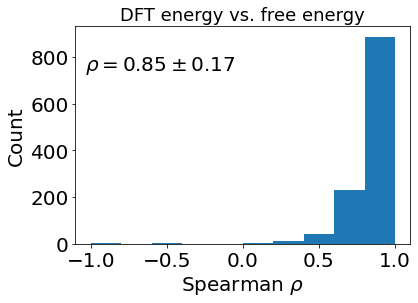

In [10]:
plot_free_en_comparison(censo_dict)